<a href="https://colab.research.google.com/github/ProGenei/GhadeerNoohT5/blob/main/Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 210MB/s]


## Importing Libraries

In [2]:
import pandas as pd
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [3]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [4]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [7]:
df = df.drop('Busbreakdown_ID', axis = 1)

In [10]:
df.shape

(147972, 20)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147937 entries, 0 to 147971
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147937 non-null  object
 1   Run_Type                         147848 non-null  object
 2   Bus_No                           147937 non-null  object
 3   Route_Number                     147849 non-null  object
 4   Reason                           147835 non-null  object
 5   Schools_Serviced                 147937 non-null  object
 6   Occurred_On                      147937 non-null  object
 7   Created_On                       147937 non-null  object
 8   Boro                             147937 non-null  object
 9   Bus_Company_Name                 147937 non-null  object
 10  Number_Of_Students_On_The_Bus    147937 non-null  int64 
 11  Has_Contractor_Notified_Schools  147937 non-null  object
 12  Has_Contractor_Notifi

In [27]:
df['Run_Type'] = df['Run_Type'].fillna(df['Run_Type'].mode()[0])

In [28]:
df['Route_Number'] = df['Route_Number'].fillna(df['Route_Number'].mode()[0])

In [29]:
df['Reason'] = df['Reason'].fillna(df['Reason'].mode()[0])

In [30]:
df.isnull().sum()

,0
School_Year,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0
Bus_Company_Name,0


In [19]:
df['How_Long_Delayed'].value_counts()

,count
How_Long_Delayed,
20 MINS,5652
30 MINS,4541
30 minutes,3650
15 mins,3522
30MINS,3199
...,...
45 MON,1
18 mins,1
146,1


In [20]:
df = df.drop('How_Long_Delayed', axis = 1)

In [24]:
df['Boro'] = df['Boro'].fillna(df['Boro'].mode()[0])

In [23]:
df['Boro'].value_counts()

,count
Boro,
Bronx,40966
Brooklyn,35632
Manhattan,28673
Queens,21168
Staten Island,6923
Westchester,4535
Nassau County,1970
New Jersey,887
Rockland County,491


In [13]:
df.duplicated().sum()

35

In [15]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [11]:
df = df.drop('Incident_Number', axis = 1)

In [35]:
df = df.drop('Bus_No', axis = 1)

In [36]:
df = df.drop('Route_Number', axis = 1)

In [37]:
df = df.drop('Schools_Serviced', axis = 1)

In [ ]:
date = pd.to_datetime(df['Occurred_On'], format='%Y-%m-%d %H:%M:%S.%f')

In [38]:
for col in df.columns:
  print(df[col].value_counts())
  print(df[col].dtypes)
  print()

School_Year
2016-2017    83111
2015-2016    63180
2017-2018     1645
2019-2020        1
Name: count, dtype: int64
object

Run_Type
Special Ed AM Run          86075
Pre-K/EI                   20922
Special Ed PM Run          17670
General Ed AM Run          17182
General Ed PM Run           4541
Special Ed Field Trip        628
General Ed Field Trip        570
Project Read PM Run          300
Project Read AM Run           47
Project Read Field Trip        2
Name: count, dtype: int64
object

Reason
Heavy Traffic                  87502
Other                          21661
Mechanical Problem             13905
Won`t Start                     7276
Flat Tire                       4585
Weather Conditions              4527
Late return from Field Trip     3464
Problem Run                     2204
Delayed by School               1446
Accident                        1367
Name: count, dtype: int64
object

Occurred_On
09/09/2015 08:00:00 AM    39
01/25/2016 07:30:00 AM    39
01/25/2016 07:00:00 AM  

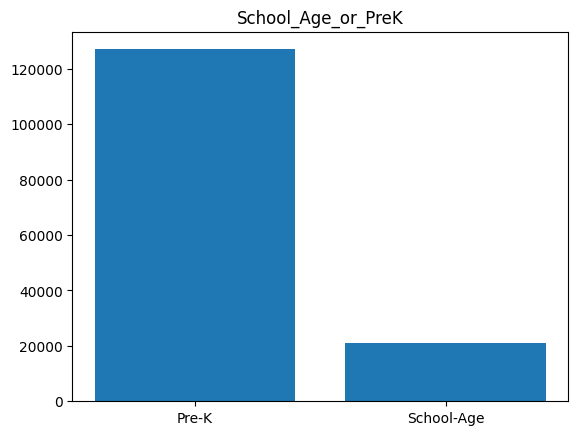

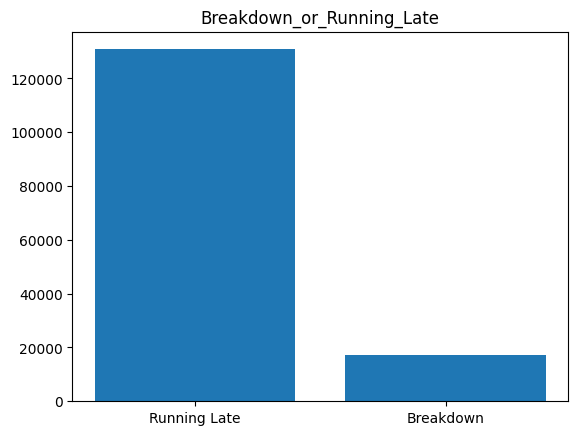

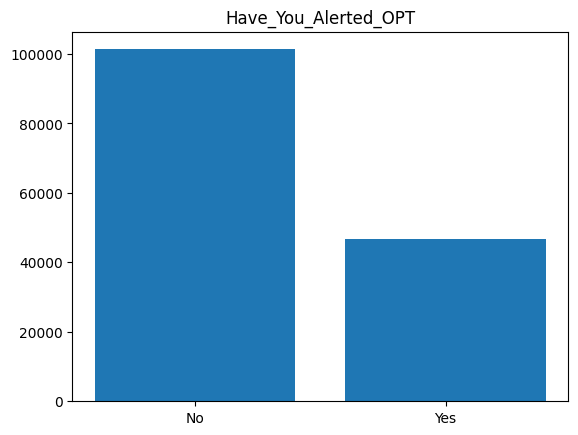

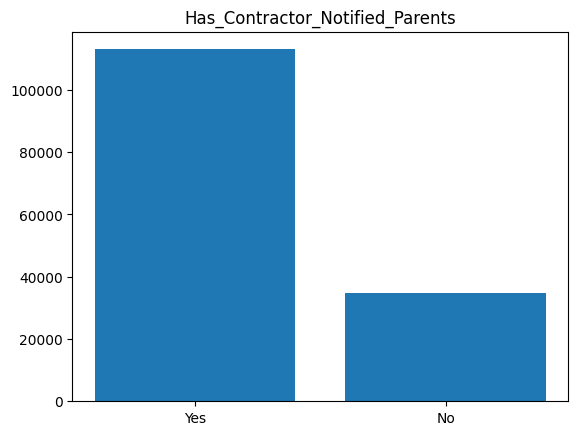

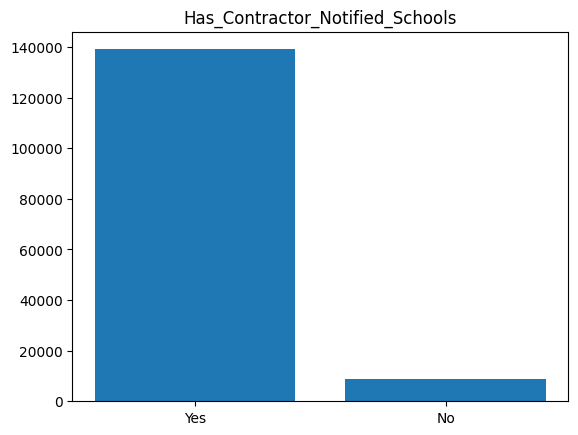

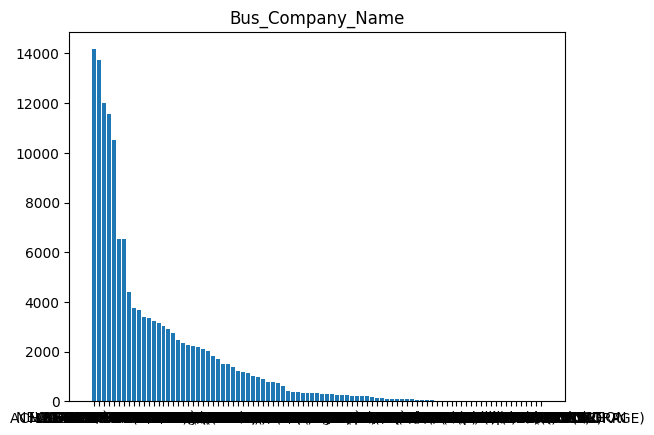

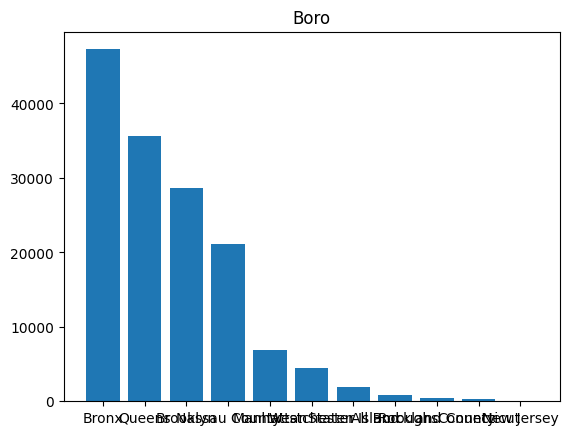

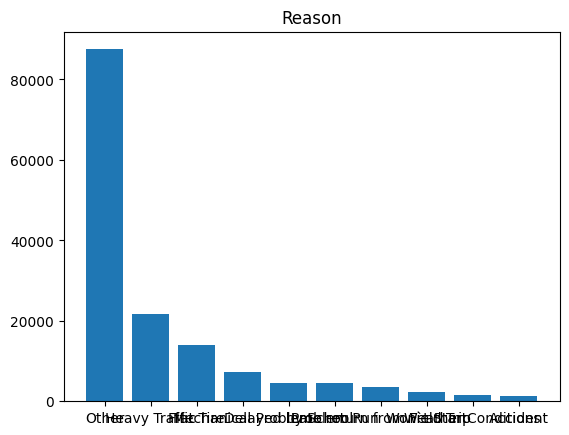

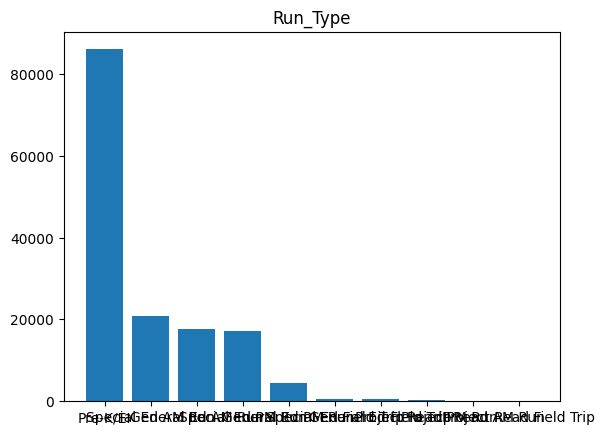

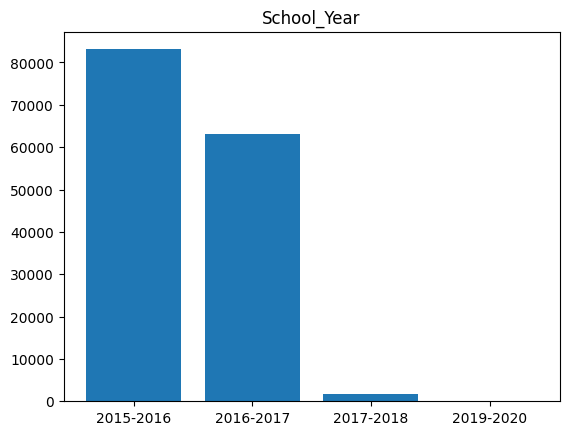

In [46]:
import matplotlib.pyplot as plt
categorical_features = df[['School_Age_or_PreK', 'Breakdown_or_Running_Late', 'Have_You_Alerted_OPT', 'Has_Contractor_Notified_Parents', 'Has_Contractor_Notified_Schools', 'Bus_Company_Name', 'Boro', 'Reason', 'Run_Type', 'School_Year']]
for col in categorical_features:
  plt.bar(df[col].unique(), df[col].value_counts())
  plt.title(col)
  plt.show()

In [48]:
df.describe()

,Number_Of_Students_On_The_Bus
count,147937.000000
mean,3.590278
std,55.372386
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,9007.000000


In [50]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  return ((~df[(df < (IQR - Q1*1.5)) | (df > (IQR + Q3*1.5))]))

df['Number_Of_Students_On_The_Bus'] = remove_outlier(df['Number_Of_Students_On_The_Bus'])

In [52]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [53]:
categorical_features = df[['School_Age_or_PreK', 'Breakdown_or_Running_Late', 'Have_You_Alerted_OPT', 'Has_Contractor_Notified_Parents', 'Has_Contractor_Notified_Schools', 'Bus_Company_Name', 'Boro', 'Reason', 'Run_Type', 'School_Year']]
for col in categorical_features:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [54]:
import seaborn as sns

In [63]:
import pandas as pd
import numpy as np
from datetime import datetime


In [88]:

df['Occurred_On'] = pd.to_datetime(df['Occurred_On'])


In [65]:
df['Occurred_On'] = pd.to_datetime(df['Occurred_On'])
df['Created_On'] = pd.to_datetime(df['Created_On'])
df['Informed_On'] = pd.to_datetime(df['Informed_On'])
df['Last_Updated_On'] = pd.to_datetime(df['Last_Updated_On'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147937 entries, 0 to 147971
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   School_Year                      147937 non-null  int64  
 1   Run_Type                         147937 non-null  int64  
 2   Reason                           147937 non-null  int64  
 3   Occurred_On                      147937 non-null  object 
 4   Created_On                       147937 non-null  object 
 5   Boro                             147937 non-null  int64  
 6   Bus_Company_Name                 147937 non-null  int64  
 7   Number_Of_Students_On_The_Bus    115186 non-null  float64
 8   Has_Contractor_Notified_Schools  147937 non-null  int64  
 9   Has_Contractor_Notified_Parents  147937 non-null  int64  
 10  Have_You_Alerted_OPT             147937 non-null  int64  
 11  Informed_On                      147937 non-null  object 
 12  Last_Up

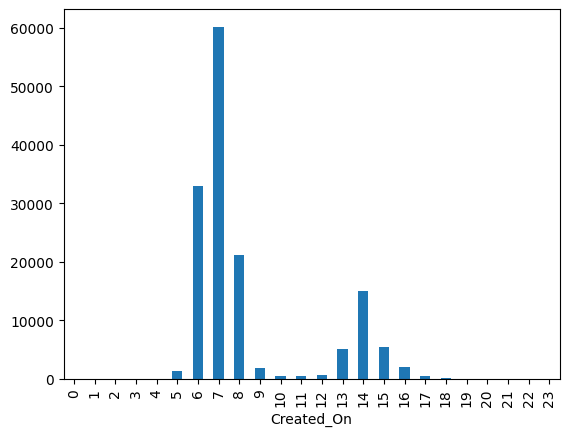

In [81]:
def visualize_data(df):
    y = df.groupby(df.dt.hour).count()
    for i in range(24):
        y.loc[i] = 0 if i not in y.index else y.loc[i]  # Add missing locations.
    y.sort_index(inplace = True)   # Sort the locations.
    y.plot(kind="bar")
    plt.show()
visualize_data(df['Created_On'])

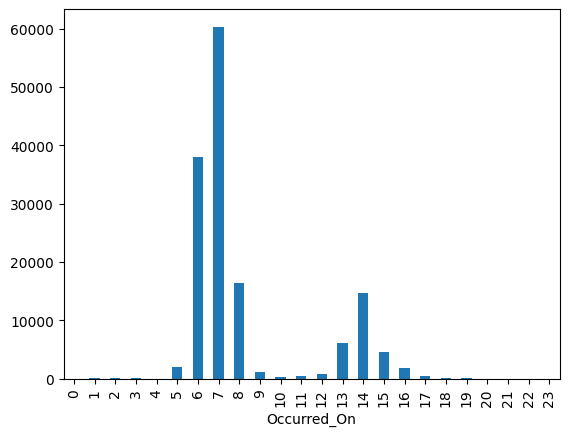

In [80]:
def visualize_data(df):
    y = df.groupby(df.dt.hour).count()
    for i in range(24):
        y.loc[i] = 0 if i not in y.index else y.loc[i]  # Add missing locations.
    y.sort_index(inplace = True)   # Sort the locations.
    y.plot(kind="bar")
    plt.show()
visualize_data(df['Occurred_On'])

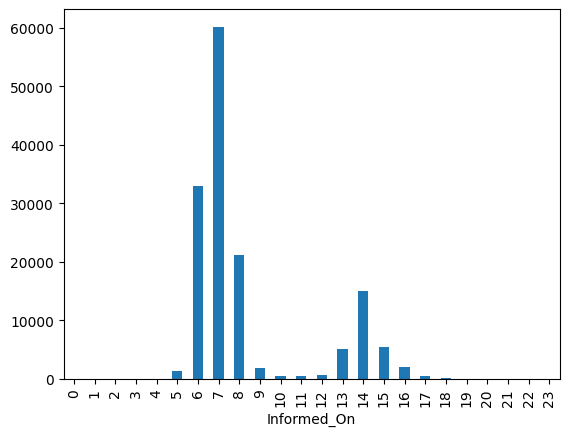

In [79]:
def visualize_data(df):
    y = df.groupby(df.dt.hour).count()
    for i in range(24):
        y.loc[i] = 0 if i not in y.index else y.loc[i]  # Add missing locations.
    y.sort_index(inplace = True)   # Sort the locations.
    y.plot(kind="bar")
    plt.show()
visualize_data(df['Informed_On'])

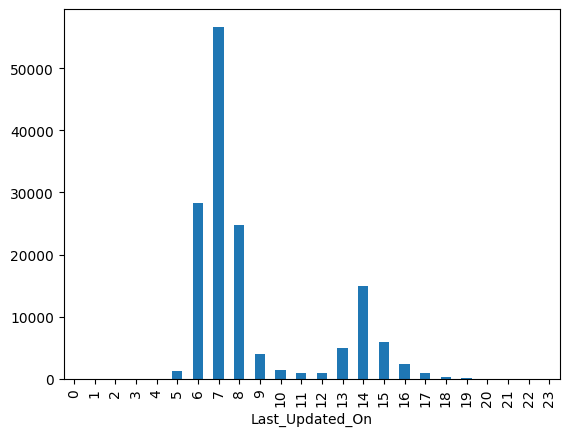

In [78]:
def visualize_data(df):
    y = df.groupby(df.dt.hour).count()
    for i in range(24):
        y.loc[i] = 0 if i not in y.index else y.loc[i]  # Add missing locations.
    y.sort_index(inplace = True)   # Sort the locations.
    y.plot(kind="bar")
    plt.show()
visualize_data(df['Last_Updated_On'])

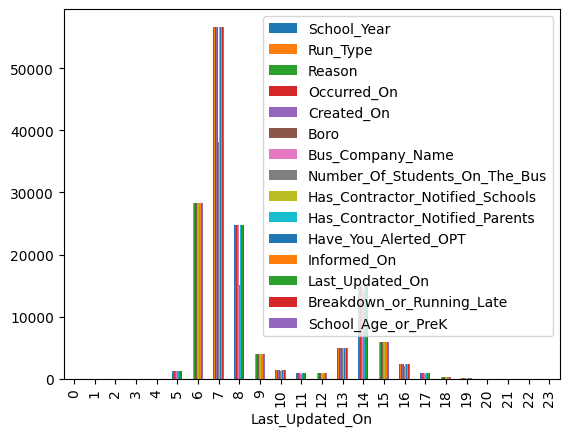

In [73]:
res = df.groupby(df["Last_Updated_On"].dt.hour).count().reindex(np.arange(24), fill_value=0)
res.plot(kind="bar")
plt.show()

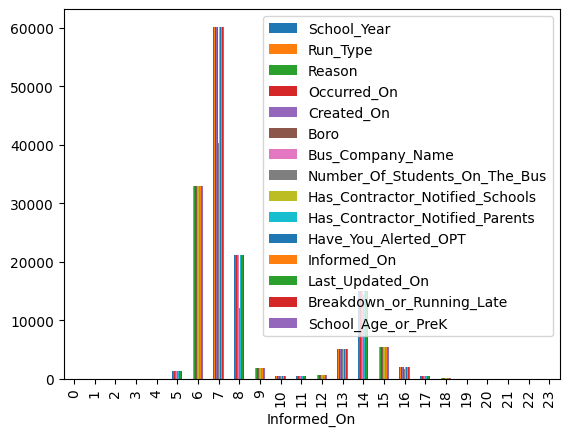

In [72]:
res = df.groupby(df["Informed_On"].dt.hour).count().reindex(np.arange(24), fill_value=0)
res.plot(kind="bar")
plt.show()

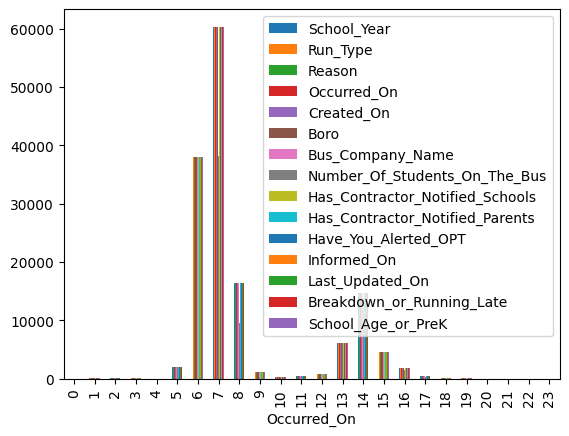

In [71]:
res = df.groupby(df["Occurred_On"].dt.hour).count().reindex(np.arange(24), fill_value=0)
res.plot(kind="bar")
plt.show()

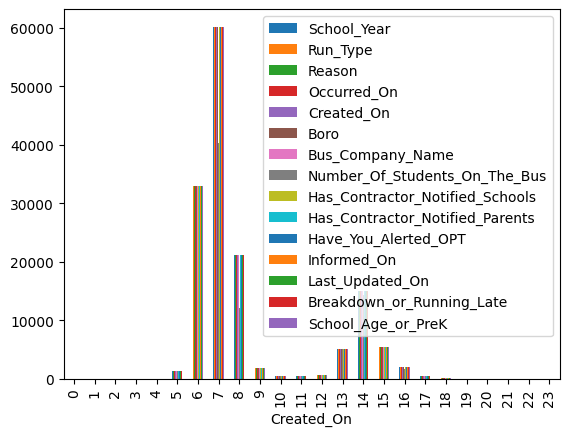

In [70]:
res = df.groupby(df["Created_On"].dt.hour).count().reindex(np.arange(24), fill_value=0)
res.plot(kind="bar")
plt.show()

<Axes: >

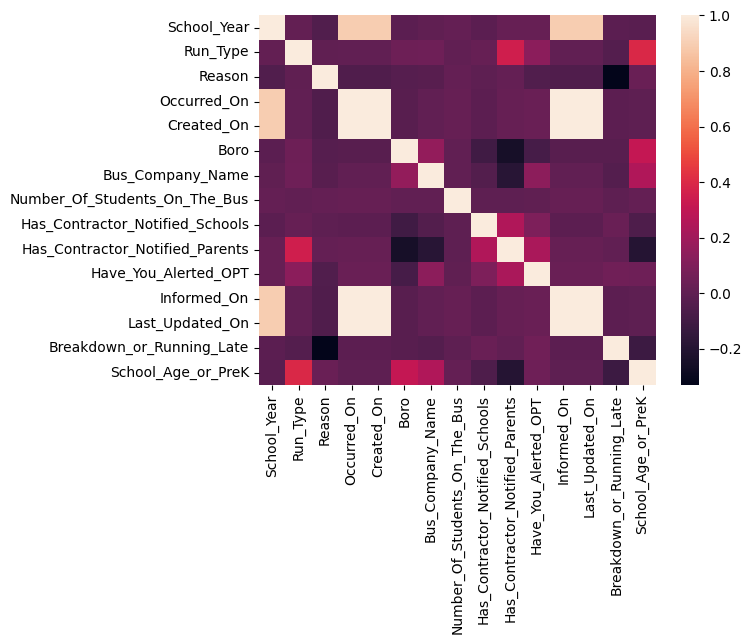

In [67]:
sns.heatmap(df.corr())

target = Breakdown_or_Running_Late

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147937 entries, 0 to 147971
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   School_Year                      147937 non-null  int64         
 1   Run_Type                         147937 non-null  int64         
 2   Reason                           147937 non-null  int64         
 3   Occurred_On                      147937 non-null  datetime64[ns]
 4   Created_On                       147937 non-null  datetime64[ns]
 5   Boro                             147937 non-null  int64         
 6   Bus_Company_Name                 147937 non-null  int64         
 7   Number_Of_Students_On_The_Bus    115186 non-null  float64       
 8   Has_Contractor_Notified_Schools  147937 non-null  int64         
 9   Has_Contractor_Notified_Parents  147937 non-null  int64         
 10  Have_You_Alerted_OPT             147937 non-null 

In [95]:
X = df[['School_Age_or_PreK', 'Breakdown_or_Running_Late', 'Have_You_Alerted_OPT', 'Has_Contractor_Notified_Parents', 'Has_Contractor_Notified_Schools', 'Bus_Company_Name', 'Boro', 'Reason', 'Run_Type', 'School_Year']]
y = df['Breakdown_or_Running_Late']

In [96]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# With Balanced Data

<BarContainer object of 2 artists>

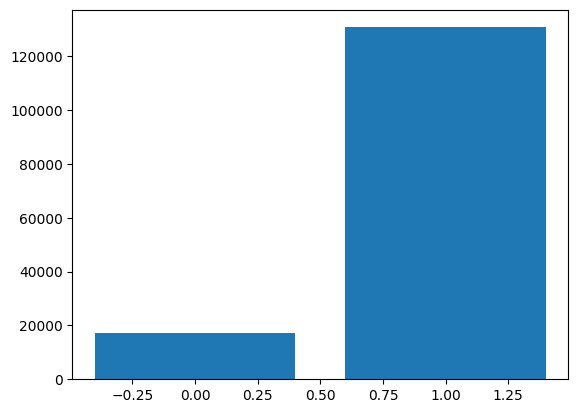

In [124]:
plt.bar(y.value_counts().index, y.value_counts().values)

In [129]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

<BarContainer object of 2 artists>

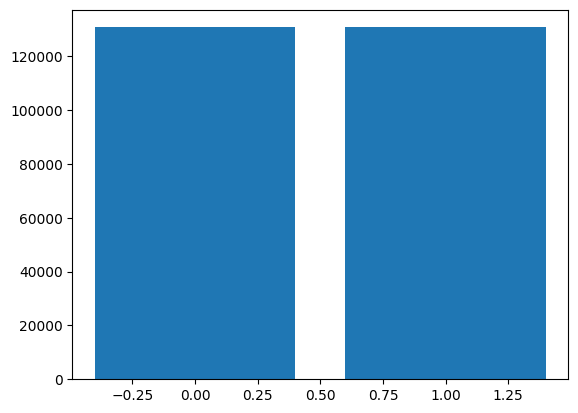

In [130]:
plt.bar(y.value_counts().index, y.value_counts().values)

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
from keras.models import Sequential
from keras.layers import Activation, Dense


In [134]:
model = Sequential()
model.add(Dense(units = 6, input_dim=X_train.shape[1], kernel_initializer='uniform', activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [135]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [136]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199 (796.00 B)

 Trainable params: 199 (796.00 B)

 Non-trainable params: 0 (0.00 B)

In [137]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - accuracy: 0.9730 - loss: 0.2170 - val_accuracy: 1.0000 - val_loss: 0.0173
Epoch 2/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 3/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 2.1179e-04
Epoch 4/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 1.0000 - loss: 1.3704e-04 - val_accuracy: 1.0000 - val_loss: 2.4503e-05
Epoch 5/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 1.0000 - loss: 1.5798e-05 - val_accuracy: 1.0000 - val_loss: 2.8336e-06
Epoch 6/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 1.0000 - loss: 1.8378e-06 - val_accuracy: 1.0000 - val_loss: 3.4724e-07
Epoch 7/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 1.0000 - loss: 2.3271e-07 - val_accuracy: 1.0000 - val_loss: 5.9001e-08
Epoch 8/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 23s 3

In [ ]:
model.evaluate(X_test, y_test)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

# With Unbalanced Data

In [98]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [101]:
from keras.models import Sequential
from keras.layers import Activation, Dense


In [112]:
model = Sequential()
model.add(Dense(units = 6, input_dim=X_train.shape[1], kernel_initializer='uniform', activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [113]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [114]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199 (796.00 B)

 Trainable params: 199 (796.00 B)

 Non-trainable params: 0 (0.00 B)

In [115]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
2959/2959 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9478 - loss: 0.1454 - val_accuracy: 1.0000 - val_loss: 8.9572e-05
Epoch 2/50
2959/2959 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 1.0000 - loss: 5.0983e-05 - val_accuracy: 1.0000 - val_loss: 9.1605e-06
Epoch 3/50
2959/2959 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 1.0000 - loss: 5.9003e-06 - val_accuracy: 1.0000 - val_loss: 1.4818e-06
Epoch 4/50
2959/2959 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 1.0000 - loss: 9.8050e-07 - val_accuracy: 1.0000 - val_loss: 2.6619e-07
Epoch 5/50
2959/2959 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 1.0000 - loss: 1.7985e-07 - val_accuracy: 1.0000 - val_loss: 5.8064e-08
Epoch 6/50
2959/2959 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 1.0000 - loss: 4.1145e-08 - val_accuracy: 1.0000 - val_loss: 1.7052e-08
Epoch 7/50
2959/2959 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 1.0000 - loss: 1.3564e-08 - val_accuracy: 1.0000 - val_loss: 7.9198e-09
Epoch 8/50
2959/2959 ━━━━━━━━━━━━━━━

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [140]:
model.evaluate(X_test, y_test)

1636/1636 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 1.0000 - loss: 1.4810e-08


[1.4846784246458355e-08, 1.0]

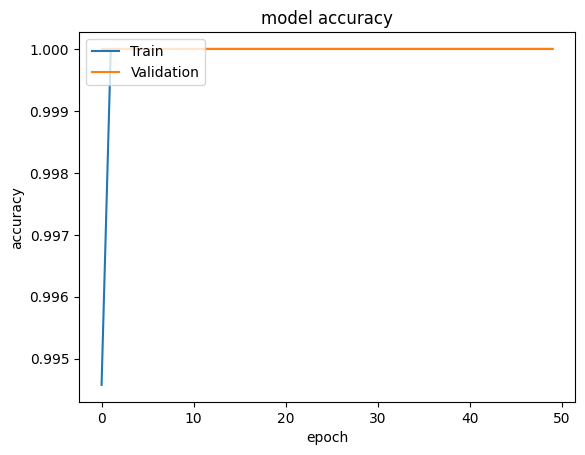

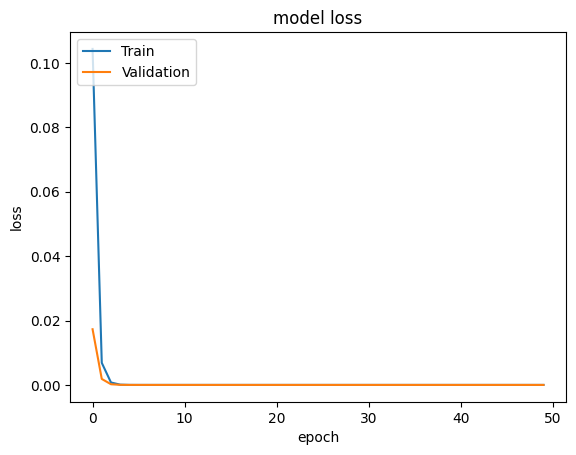

In [158]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [169]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score


1636/1636 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('./my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

- I did scaling to normalize the range of the data, and labelencoding to convert the categorical to numerical to make the process of training model
- I made the input_dim=the shape of the X_train, and the activation is relu, the layers of numbers to make higher accuracy without overfitting, and the accuracy was 100% which is perfect, the final layer I made as 1 unit because it's binary and the activation is sigmoid because the output is also binary
- I tried several times with different epochs and batch size and I choose the one that provide higher accuracy
- the Loss Function is binary_crossentropy because the number of classes is binary (only 2) and Metrics I used accuracy and loss function
- I didnt used any of regularization because the accuracy was already higher with the original layers
- the model isn't overfitting or underfitting which is well